In [2]:
import keras 
from keras.layers import LSTM,Dense,Conv1D,MaxPooling1D
from keras.models import Sequential,Model
from gensim.models import Word2Vec
from keras.layers import Bidirectional,TimeDistributed
import numpy as np
import codecs
import regex
import  matplotlib.pyplot as plt

In [3]:
data_div=1
sent=[]
tags=[]
with codecs.open("v1_train.te","r",encoding="utf-8") as f:
    l1=[]
    l2=[]
    for i in f:
        x=i.split()
        if(x[0]=="newline"):
            sent.append(l1)
            tags.append(l2)
            l1=[]
            l2=[]
        else:
            l1.append(x[0])
            l2.append(x[1])

In [4]:
print(len(sent))
tag_count=0
for i in tags:
    for j in i:
        if(j!="other"):
            tag_count+=1
print(tag_count)
tag_map={'datenum': 0,
 'event': 0,
 'location': 0,
 'name': 0,
 'number': 0,
 'occupation': 0,
 'organization': 0,
 'other': 0,
 'things': 0}
for i in tags:
    for j in i:
        tag_map[j]+=1
print(tag_map)
print()

63223
200060
{'location': 95756, 'occupation': 8437, 'name': 60499, 'datenum': 2521, 'number': 28618, 'things': 1069, 'other': 577625, 'organization': 2431, 'event': 729}



In [3]:
from sklearn.model_selection import train_test_split
sent,pre_x_test,tags,pre_y_test=train_test_split(sent,tags,test_size=0.1,random_state=1)
print(len(sent))
print(len(tags))
print(len(pre_x_test))
print(len(pre_y_test))

56900
56900
6323
6323


/home/sagar/tensorflow/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/sagar/tensorflow/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


0 : 8990
1 : 10323
2 : 8196
3 : 5380
4 : 5310
5 : 9749
6 : 4407
7 : 1552
8 : 1213
9 : 651
10 : 363
11 : 253
12 : 165
13 : 112
14 : 66
15 : 37
16 : 38
17 : 10
18 : 14
19 : 18
20 : 9
21 : 6
22 : 3
23 : 4
24 : 5
25 : 1
26 : 2
27 : 3
28 : 1
29 : 1
30 : 2
31 : 4
32 : 2
34 : 1
36 : 1
39 : 1
41 : 1
44 : 1
48 : 1
62 : 1
68 : 1
78 : 1
205 : 1


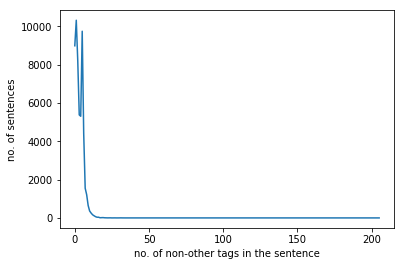

In [4]:
def get_data_distribution(sent,tags):
    cnt_dict={}
    for i in tags:
        cnt=0
        for j in i:
            if(j!="other"):
                cnt+=1
        if(cnt in cnt_dict):
            cnt_dict[cnt]+=1
        else:
            cnt_dict[cnt]=1
    cnt_list=list(cnt_dict.keys())
    cnt_list.sort()
    l1=[]
    l2=[]
    for i in cnt_list:
        print(i,":",cnt_dict[i])
        l1.append(i)
        l2.append(cnt_dict[i])
    plt.plot(l1,l2)
    plt.xlabel("no. of non-other tags in the sentence")
    plt.ylabel("no. of sentences")
    plt.show()
get_data_distribution(sent,tags)

In [5]:
def filter_data(sent,tags,exclude_list):
    sent_filter=[]
    tags_filter=[]
    for i in range(len(tags)):
    #     print(tags[i])
        cnt=0
        for j in tags[i]:
            if(j!="other"):
                cnt+=1
        if(cnt in exclude_list):
            continue
        if(cnt>=0):
            sent_filter.append(sent[i])
            tags_filter.append(tags[i])
    return sent_filter,tags_filter
sent_filter,tags_filter=filter_data(sent,tags,[])
print(len(sent_filter))
print(len(tags_filter))

56900
56900


In [6]:
sent=sent_filter
tags=tags_filter
def divide_data_pactise(sent,tags,data_div):
    print("initial_len=",len(sent))
    sent=sent[:len(sent)//data_div]
    tags=tags[:len(tags)//data_div]
    return sent,tags
sent,tags=divide_data_pactise(sent,tags,data_div)
print("new_len=",len(sent))

initial_len= 56900
new_len= 56900


In [7]:
for i in sent[:10]:
    print(i)

['ఈయన', 'తాత', 'రాయ్', 'బహాదుర్', 'సేఠ్', 'బన్సీలాల్', 'ను', 'బ్రిటీషు', 'ప్రభుత్వం', 'సర్', 'బిరుదాంకితున్ని', 'చేసి', 'గౌరవించింది', '.']
['ముషిడిపల్లి', ',', 'విశాఖపట్నం', 'జిల్లా', ',', 'దేవరాపల్లి', 'మండలానికి', 'చెందిన', 'గ్రామము', '.']
['సౌందర్య', 'జులై', '18', ',', '1972', '-', 'ఏప్రిల్', '17', ',', '2004', 'ప్రముఖ', 'సినీనటి', '.']
['భావన్నపాలెం', ',', 'ఖమ్మం', 'జిల్లా', ',', 'పెనుబల్లి', 'మండలానికి', 'చెందిన', 'గ్రామము', '.']
['అది', 'ఆ', 'దేశానికి', 'వెళితే', 'కానీ', 'తెలియదు', '.']
['వెంకటాపురం', ',', 'ముదిగొండ', ',', 'ఖమ్మం', 'జిల్లా', ',', 'ముదిగొండ', 'మండలానికి', 'చెందిన', 'గ్రామము', '.']
['రాజపుత్రుల', 'సంతతివారు', 'ఇప్పటికీ', 'వారి', 'హోదాలో', 'కొనసాగుతున్నారు', '.']
['సిర్పూర్', ',', 'నిజామాబాదు', 'జిల్లా', ',', 'మద్నూరు', 'మండలానికి', 'చెందిన', 'గ్రామము', '.']
['జంపపాలెం', ',', 'విశాఖపట్నం', 'జిల్లా', ',', 'ఎలమంచిలి', 'మండలానికి', 'చెందిన', 'గ్రామము', '.']
['ను', 'ప్రస్తుతం', 'చిహ్నం', 'ఆధ్వర్యంలోని', 'ఇంటర్', '\u200c', 'యాక్టివ్', '\u200c', 'కార్ప్', 'కలిగి', 'ఉంది'

In [8]:
max_sent_len=-1
for i in sent:
    if(len(i)>max_sent_len):
        max_sent_len=len(i)
print("max_sent_len",max_sent_len)
avg_sent_len=0
for i in sent:
    avg_sent_len+=len(i)
avg_sent_len=avg_sent_len/len(sent)
print("avg_sent_len",avg_sent_len)
max_len=int(2*(avg_sent_len))
print("max_sent_len_fit",max_len)

max_sent_len 844
avg_sent_len 12.298664323374341
max_sent_len_fit 24


In [9]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.sequence import pad_sequences

In [10]:
# regex.findall(r'\X', sent[0][0])
def separate_into_char(sent):
    char=[]
    for i in sent:
        for j in i:
            l=regex.findall(r'\X',j)
            char.append(l)
    return char
char=separate_into_char(sent)

In [11]:

for i in char[:10]:
    print(i)


['ఈ', 'య', 'న']
['తా', 'త']
['రా', 'య్']
['బ', 'హా', 'దు', 'ర్']
['సే', 'ఠ్']
['బ', 'న్', 'సీ', 'లా', 'ల్']
['ను']
['బ్', 'రి', 'టీ', 'షు']
['ప్', 'ర', 'భు', 'త్', 'వం']
['స', 'ర్']


In [12]:
char_embedding_size=50
word_min_count=1
c2v=Word2Vec(char,size=char_embedding_size,min_count=word_min_count)
# print(c2v.wv["ल"])
# c2v.wv.most_similar(positive="ा")

In [13]:
# c2v.wv.most_similar(positive="क")
len(c2v.wv.vocab)

1563

In [14]:
tokenizer_char=Tokenizer()
tokenizer_char.fit_on_texts(char)
char_index=tokenizer_char.word_index
print(len(char_index))
num_char=(len(char_index)*3)//4
print(num_char)

1563
1172


In [15]:
def add_unk_char(char_index,num_char):
    ref={}
    for i,j in char_index.items():
        if(j<=num_char):
            ref[i]=j
    ref["<UNK_CHAR>"]=num_char+1
    char_index=ref
    char_index_rev={}
    for (i,j) in char_index.items():
        char_index_rev[j]=i
    print(char_index["<UNK_CHAR>"])
    print(char_index_rev[char_index["<UNK_CHAR>"]])
    return char_index,char_index_rev
char_index,char_index_rev=add_unk_char(char_index,num_char)

1173
<UNK_CHAR>


In [16]:
print("No. of chars:",len(char_index))

No. of chars: 1173


In [17]:
max_char_len=-1
for i in char:
    if(len(i)>max_char_len):
        max_char_len=len(i)
print(max_char_len)
avg_char_len=0
for i in char:
    avg_char_len+=len(i)
avg_char_len=avg_char_len/len(char)
print(avg_char_len)
max_char_len=int(2*avg_char_len)
print("max_char_len_fit",max_char_len)

27
3.265350946135577
max_char_len_fit 6


In [18]:
tokenizer_sent=Tokenizer()
tokenizer_tags=Tokenizer()
tokenizer_sent.fit_on_texts(sent)
tokenizer_tags.fit_on_texts(tags)
word_index_sent=tokenizer_sent.word_index
word_index_tags=tokenizer_tags.word_index
print("No. of words:",len(word_index_sent))
print("No. of tags:",len(word_index_tags))
num_words=(len(word_index_sent)*3)//4
print(num_words)

No. of words: 101048
No. of tags: 9
75786


In [19]:

ref={}
for i,j in word_index_sent.items():
    if(j<=num_words):
        ref[i]=j
ref["<UNK_WORD>"]=num_words+1
word_index_sent=ref

In [20]:
word_index_rev_sent={}
word_index_rev_tags={}
for i,j in word_index_sent.items():
    word_index_rev_sent[j]=i
for i,j in word_index_tags.items():
    word_index_rev_tags[j]=i

In [21]:
# word_index_sent

In [22]:
word_char={}
for i,j in word_index_sent.items():
#     print(i,j)
    l=[]
    if(i=="<UNK_WORD>"):
        l=[char_index["<UNK_CHAR>"]]*max_char_len
        word_char[i]=l
#         print(l)
        continue
    for k in regex.findall(r'\X',i):
        if(k in char_index):
#             print(k,end="-")
            h=char_index[k]
        else:
#             print(k)
            h=char_index["<UNK_CHAR>"]
#         else:
#             print(i)
#             print(k,end="-")
#             h=char_index["<UNK_CHAR>"]
#             print("********")
#             print("------------------------------")
#             #         print(h)
        l.append(h)
    word_char[i]=l

In [23]:
# for i in word_char.items():
#     print(i)
# print(word_char["<UNK_WORD>"])

In [24]:
for i,j in word_char.items():
    word_char[i]=pad_sequences([j],maxlen=max_char_len,padding="post")[0]

In [25]:
print(len(word_char))
counter=0
for i in word_char.items():
    print(i)
    counter+=1
    if(counter==10):break

75787
('తారీఖుల', array([ 82,  85, 380,   8,   0,   0], dtype=int32))
('గొయ్యిగుంట', array([251, 174,  84, 223,  56,   0], dtype=int32))
('వాటాదారుల', array([ 48, 130,  86,  19,   8,   0], dtype=int32))
('చర్మానికి', array([72,  6, 52,  4, 27,  0], dtype=int32))
('బేరు', array([344,  19,   0,   0,   0,   0], dtype=int32))
('కేంద్రం', array([237,  45,  38,   0,   0,   0], dtype=int32))
('తాంస', array([378,  50,   0,   0,   0,   0], dtype=int32))
('పళ్ళను', array([ 21, 141, 181,  60,   0,   0], dtype=int32))
('చప్పిడివాండ్లపల్లె', array([408,  51,   8,  21,  10, 168], dtype=int32))
('ఛెప్పి', array([603,  25,  90,   0,   0,   0], dtype=int32))


In [26]:
# word_char={}
# for i,j in word_index_sent.items():
#     l=[]
#     for k in regex.findall(r'\X',i):
#         if(k in char_index):
#             l.append(char_index[k])
#         else:
#             l.append(char_index["<UNK_CHAR>"])
#     word_char[i]=l
# for i,j in word_char.items():
#     word_char[i]=pad_sequences([j],maxlen=max_char_len,padding="post")[0]

In [27]:
# 

In [28]:
print(len(word_char))
counter=0
for i in word_char.items():
    print(i)
    counter+=1
    if(counter==10):break

75787
('తారీఖుల', array([ 82,  85, 380,   8,   0,   0], dtype=int32))
('గొయ్యిగుంట', array([251, 174,  84, 223,  56,   0], dtype=int32))
('వాటాదారుల', array([ 48, 130,  86,  19,   8,   0], dtype=int32))
('చర్మానికి', array([72,  6, 52,  4, 27,  0], dtype=int32))
('బేరు', array([344,  19,   0,   0,   0,   0], dtype=int32))
('కేంద్రం', array([237,  45,  38,   0,   0,   0], dtype=int32))
('తాంస', array([378,  50,   0,   0,   0,   0], dtype=int32))
('పళ్ళను', array([ 21, 141, 181,  60,   0,   0], dtype=int32))
('చప్పిడివాండ్లపల్లె', array([408,  51,   8,  21,  10, 168], dtype=int32))
('ఛెప్పి', array([603,  25,  90,   0,   0,   0], dtype=int32))


In [29]:
word_char_int={}
for i,j in word_char.items():
    word_char_int[word_index_sent[i]]=j
# for i in word_char_int.items():
#     print(i)



In [30]:
word_char_embedding_matrix=np.zeros((len(word_char) + 1, max_char_len))
for i,j in word_char_int.items():
    word_char_embedding_matrix[i]=j

In [31]:
# for i in word_char_embedding_matrix:
#     print(i)


In [32]:
char_embedding_matrix = np.zeros((len(word_char) + 1, char_embedding_size))
for i,j in char_index_rev.items():
    if(j in c2v.wv.vocab):
        char_embedding_matrix[i]=c2v.wv[j]
print(char_embedding_matrix.shape)

(75788, 50)


In [33]:
# for i in char_embedding_matrix:
#     print(i)

In [34]:
char_int=[]
for i in word_char_int.items():
    char_int.append(i[1])
# print(char_int)

In [35]:
word_index_tags

{'datenum': 6,
 'event': 9,
 'location': 2,
 'name': 3,
 'number': 4,
 'occupation': 5,
 'organization': 7,
 'other': 1,
 'things': 8}

In [36]:
# word_char["<UNK_WORD>"]#array([2389, 2389, 2389, 2389, 2389], dtype=int32)
# word_index_sent["<UNK_WORD>"]#2389
for i,j in word_index_rev_sent.items():
    if(j=="<UNK_WORD>"):
        print(j)


<UNK_WORD>


In [37]:
sent_int=[]
for i in sent:
    l=[]
    for j in i:
        if(j in word_index_sent):
            l.append(word_index_sent[j])
        else:
            l.append(word_index_sent["<UNK_WORD>"])
    sent_int.append(l)
tags_int=[]
for i in tags:
    l=[]
    for j in i:
        l.append(word_index_tags[j])
    tags_int.append(l)


In [38]:
sent_int_padded=pad_sequences(sent_int,maxlen=max_len,padding='post')
tags_int_padded=pad_sequences(tags_int,maxlen=max_len,padding="post")
# for i in tags_int_padded:
#     print(i)

In [39]:
embedding_size=100
workers=5
window_size=5
word_min_count=1

In [40]:
# for i in sent:
#     print(i)

In [41]:
w2v=Word2Vec(sent,size=embedding_size,workers=workers,window=window_size,min_count=word_min_count)
embedding_matrix = np.zeros((len(word_index_sent) + 1, embedding_size))
print(embedding_matrix.shape)

(75788, 100)


In [42]:
for i,j in word_index_rev_sent.items():
    if(j in w2v.wv.vocab):
        embedding_matrix[i]=w2v.wv[j]
print(embedding_matrix)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.01467825e-01  7.06774950e-01 -1.37885976e+00 ... -2.24293494e+00
  -1.17928229e-01  1.00047207e+00]
 [ 3.65822345e-01 -4.12600562e-02  2.58563757e-01 ... -2.29337955e+00
   1.32680571e+00  7.06884325e-01]
 ...
 [ 2.38899258e-03  8.25362187e-03 -4.01784433e-03 ... -4.04592091e-03
   4.04206058e-03 -3.61227058e-03]
 [-3.19019938e-03  1.57769921e-03 -4.84490301e-03 ... -8.31121765e-03
   1.14596868e-03  7.11006066e-03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


In [43]:
tag_dir={}
for i in word_index_tags.items():
    print(i)
    tag_dir[i[0]]=np.eye(len(word_index_rev_tags))[i[1]-1]
print(tag_dir)

('number', 4)
('organization', 7)
('location', 2)
('datenum', 6)
('other', 1)
('occupation', 5)
('event', 9)
('name', 3)
('things', 8)
{'number': array([0., 0., 0., 1., 0., 0., 0., 0., 0.]), 'event': array([0., 0., 0., 0., 0., 0., 0., 0., 1.]), 'name': array([0., 0., 1., 0., 0., 0., 0., 0., 0.]), 'location': array([0., 1., 0., 0., 0., 0., 0., 0., 0.]), 'datenum': array([0., 0., 0., 0., 0., 1., 0., 0., 0.]), 'other': array([1., 0., 0., 0., 0., 0., 0., 0., 0.]), 'occupation': array([0., 0., 0., 0., 1., 0., 0., 0., 0.]), 'organization': array([0., 0., 0., 0., 0., 0., 1., 0., 0.]), 'things': array([0., 0., 0., 0., 0., 0., 0., 1., 0.])}


In [44]:
print(tags_int_padded.shape)

(56900, 24)


In [45]:
tags_vec=[]
count=0
for i in tags_int_padded:
    l=[]
    for j in i:
#         print(j,end="____")
        if(j==0):
            l.append(tag_dir["other"])
        else:
            l.append(tag_dir[word_index_rev_tags[j]])
    l=np.array(l)
#     print(l.shape)
#     print(count)
    count+=1
    tags_vec.append(l)

In [46]:
print(sent_int_padded.shape)
print(tags_int_padded.shape)
print(np.array(tags_vec).shape)
print(sent[0])

print(tags[0])

(56900, 24)
(56900, 24)
(56900, 24, 9)
['ఈయన', 'తాత', 'రాయ్', 'బహాదుర్', 'సేఠ్', 'బన్సీలాల్', 'ను', 'బ్రిటీషు', 'ప్రభుత్వం', 'సర్', 'బిరుదాంకితున్ని', 'చేసి', 'గౌరవించింది', '.']
['other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'name', 'other', 'other', 'other', 'other']


In [47]:
tags_vec=np.array(tags_vec)


In [48]:
num_hidden_units=300
from keras.layers import Embedding,InputLayer,Conv1D,MaxPooling1D,Input,Flatten,concatenate,merge,Reshape,Dropout

In [49]:
inputs0=Input(shape=(max_len,))
emb0=Embedding(len(word_index_sent)+1,max_char_len,weights=[word_char_embedding_matrix],trainable=False,input_length=max_len)(inputs0)
emb01=TimeDistributed(Embedding(len(word_char)+1,char_embedding_size,weights=[char_embedding_matrix],trainable=False,input_length=max_char_len))(emb0)
conv0=TimeDistributed(Conv1D(filters=20,kernel_size=5,padding="same",activation="relu"))(emb01)
conv01=TimeDistributed(Conv1D(filters=11,kernel_size=5,padding="same",activation="relu"))(conv0)
maxpool0=TimeDistributed(MaxPooling1D(pool_size=max_char_len))(conv01)
# dropout0=TimeDistributed(Dropout(0.25))(maxpool0)
newdim = tuple([x for x in maxpool0.shape.as_list() if x != 1 and x is not None])
reshape0= Reshape(newdim) (maxpool0)

In [50]:
print(emb01)
print(conv0)
print(conv01)

Tensor("time_distributed_1/Reshape_1:0", shape=(?, 24, 6, 50), dtype=float32)
Tensor("time_distributed_2/Reshape_2:0", shape=(?, 24, 6, 20), dtype=float32)
Tensor("time_distributed_3/Reshape_2:0", shape=(?, 24, 6, 11), dtype=float32)


In [51]:
inputs1=Input(shape=(max_len,))
emb1=Embedding(len(word_index_sent)+1,embedding_size,weights=[embedding_matrix],trainable=False,input_length=max_len)(inputs1)          
concat_0_1=concatenate([emb1,reshape0],axis=-1)
conv1=Conv1D(filters=15,kernel_size=5,padding="same",activation="relu")(concat_0_1)
# dropout1=Dropout(0.25)(conv1)

In [52]:
inputs2=Input(shape=(max_len,))
emb2=Embedding(len(word_index_sent)+1,embedding_size,weights=[embedding_matrix],trainable=False,input_length=max_len)(inputs2)
concat_1_2=concatenate([emb2,conv1],axis=-1)
layers=Bidirectional(LSTM(units=num_hidden_units,input_shape=(max_len,embedding_size),return_sequences=True))(concat_1_2)
# dropout2=Dropout(0.25)(layers)
layers=TimeDistributed(Dense(100))(layers)
layers=TimeDistributed(Dense(100))(layers)
layers=TimeDistributed(Dense(len(word_index_tags),activation="softmax"))(layers)


In [53]:
model=Model(inputs=[inputs0,inputs1,inputs2],outputs=layers)
model.compile(optimizer="adam",metrics=["mae","acc"],loss="categorical_crossentropy")


In [54]:
# from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test=train_test_split(sent_int_padded,tags_vec,test_size=0.3,random_state=1)
# print(x_train.shape)
# print(y_train.shape)
# print(x_test.shape)
# print(y_test.shape)
x_train=sent_int_padded
y_train=tags_vec

In [55]:
model.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 24)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 24, 6)        454728      input_1[0][0]                    
__________________________________________________________________________________________________
time_distributed_1 (TimeDistrib (None, 24, 6, 50)    3789400     embedding_1[0][0]                
__________________________________________________________________________________________________
time_distributed_2 (TimeDistrib (None, 24, 6, 20)    5020        time_distributed_1[0][0]         
__________________________________________________________________________________________________
time_distr

In [56]:
# from keras.utils import plot_model
# plot_model(model, to_file='model.png',show_shapes=True,show_layer_names=True)


In [57]:
for i in model.layers:
    print(i.name)
    print(i.input_shape)
    print(i.output_shape)
    print("--------------------")

input_1
(None, 24)
(None, 24)
--------------------
embedding_1
(None, 24)
(None, 24, 6)
--------------------
time_distributed_1
(None, 24, 6)
(None, 24, 6, 50)
--------------------
time_distributed_2
(None, 24, 6, 50)
(None, 24, 6, 20)
--------------------
time_distributed_3
(None, 24, 6, 20)
(None, 24, 6, 11)
--------------------
input_2
(None, 24)
(None, 24)
--------------------
time_distributed_4
(None, 24, 6, 11)
(None, 24, 1, 11)
--------------------
embedding_3
(None, 24)
(None, 24, 100)
--------------------
reshape_1
(None, 24, 1, 11)
(None, 24, 11)
--------------------
input_3
(None, 24)
(None, 24)
--------------------
concatenate_1
[(None, 24, 100), (None, 24, 11)]
(None, 24, 111)
--------------------
embedding_4
(None, 24)
(None, 24, 100)
--------------------
conv1d_3
(None, 24, 111)
(None, 24, 15)
--------------------
concatenate_2
[(None, 24, 100), (None, 24, 15)]
(None, 24, 115)
--------------------
bidirectional_1
(None, 24, 115)
(None, 24, 600)
--------------------
time_

In [58]:
# for i in y_train:
# #     print(i)
#     print(len(i))
#     print("------------------")
len(char_index_rev)

1173

In [59]:
# for i in x_train[:1000]:
#     for j in i:
#         if(j==0):
#             break
#         print(word_index_rev_sent[j],end="/")
#         l=[]
#         for k in word_char_int[j]:
#             if(k==0):
#                 break
#             l.append(char_index_rev[k])
#         print("".join(l),end=" ")
#     print()

In [60]:
from keras.callbacks import EarlyStopping

In [61]:
epochs=10
prev_loss=1
loss_increase_warning=0
# for i in range(epochs):
his=model.fit(x=[x_train,x_train,x_train],y=y_train,validation_split=0.2,epochs=25, batch_size=10,callbacks=[
    EarlyStopping(monitor="val_loss",mode="auto",patience=2)])

Train on 45520 samples, validate on 11380 samples
Epoch 1/25
 2540/45520 [>.............................] - ETA: 17:56 - loss: 0.2582 - mean_absolute_error: 0.0262 - acc: 0.9271

KeyboardInterrupt: 

In [ ]:
# model.evaluate([x_test,x_test,x_test],y_test)

In [ ]:
# # serialize model to JSON
# model_json = model.to_json()
# with open("model_hindi_safe.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# model.save_weights("model_hindi_safe.h5")
# print("Saved model to disk")

In [ ]:
model.save("ner_telugu_safe_final_complete_training.h5")

In [62]:
##### to predict load the new model along with the weights
from keras.models import load_model
model = load_model('ner_telugu_safe_final_complete_training.h5')

In [ ]:
# model.evaluate([x_test,x_test,x_test],y_test)==model2.evaluate([x_test,x_test,x_test],y_test)

In [ ]:

# ans=model.predict([x_test,x_test,x_test])
# c_other=0
# i_other=0
# c_non=0
# i_non=0


In [ ]:
# #### to predict load the new model along with the weights
# from keras.models import load_model
# model = load_model('ner_kannada_safe_final.h5')

In [ ]:
# pre_x_test

In [ ]:
# x_test
# y_test
pre_x_test_int=[]
for i in pre_x_test:
#     print(i)
    l=[]
    for j in i:
        if(j in word_index_sent):
            l.append(word_index_sent[j])
        else:
            l.append(word_index_sent["<UNK_WORD>"])
    pre_x_test_int.append(l)
padded_x_test=pad_sequences(pre_x_test_int,maxlen=max_len,padding="post")


In [ ]:
for i in padded_x_test:
    if(len(i)!=max_len):
        print(i)
# padded_x_test=np.array(padded_x_test)

In [ ]:
ans=model.predict([padded_x_test,padded_x_test,padded_x_test])

In [ ]:
my_ans=[]
for i in range(len(ans)):
#     print(len(ans[i]))
#     print(len(pre_x_test[i]))
    l=[]
    for j in range(len(pre_x_test[i])):
        if(j<len(ans[i])):
#             print(np.argmax(ans[i][j]),end="_")
            l.append(word_index_rev_tags[np.argmax(ans[i][j])+1])
#             printprint(len(pre_x_test))
# print(len(pre_y_test))
# print(len(my_ans))(word_index_rev_tags[np.argmax(ans[i][j])+1])
        else:
            l.append("other")
#             print(0,end="_")
#     print(l)
    my_ans.append(l)

In [ ]:
correct=0
incorrect=0
for i in range(len(my_ans)):
#     print(pre_x_test[i])
#     print(pre_y_test[i])
#     print(my_ans[i])
    for j,k in zip(my_ans[i],pre_y_test[i]):
        if(j==k):
            correct+=1
        else:
            incorrect+=1
#     print("-----------------------------------------------------------------")
print("accuracy=",(correct)/(correct+incorrect))

In [ ]:
confusion_matrix=np.zeros(shape=(len(word_index_rev_tags),len(word_index_rev_tags)),dtype="int32")
for i,j in zip(my_ans,pre_y_test):
#     print(i)
#     print(j)
#     print("----------------")
    for ii,jj in zip(i,j):
        x=word_index_tags[ii]
        y=word_index_tags[jj]
#         print(x,y)
        confusion_matrix[x-1][y-1]+=1
#         for i in confusion_matrix:
#             print(i)
#         print("-------------------")
print(confusion_matrix)

In [ ]:
for i in range(len(word_index_rev_tags)):
    print(word_index_rev_tags[i+1])
    row_sum=0
    col_sum=0
    for j in range(len(word_index_rev_tags)):
        row_sum+=confusion_matrix[i][j]
        col_sum+=confusion_matrix[j][i]
    p=confusion_matrix[i][i]/row_sum
    r=confusion_matrix[i][i]/col_sum
    f1=(2*p*r)/(p+r)
    print("precision=",p)
    print("recall=",r)
    print("f1 score=",f1)
    print('----------------------')

In [ ]:
c_other=0
i_other=0
c_non=0
i_non=0
for i,j in zip(pre_y_test,my_ans):
#     print(i,j)
    for ii,jj in zip(i,j):
#         print(x,y)
        x=ii
        y=jj
        if(x==y):
            if(x=="other"):
                c_other+=1
            else:
                c_non+=1
        elif(x!=y):
            if(x=="other"):
                i_other+=1
            else:
                i_non+=1
#other accuracy
print("other accuracy")
print("correct",c_other)
print("incorrect",i_other)
print(c_other/(c_other+i_other))


# In[ ]:


print("non other accuracy")
print("correct",c_non)
print("incorrect",i_non)
print(c_non/(c_non+i_non))

In [68]:
#################final testing########################
data_div=1
pre_x_test=[]
with codecs.open("v1_test1.te","r",encoding="utf-8") as f:
    l1=[]
    for i in f:
        i=i.strip()
        if(i=="newline"):
            pre_x_test.append(l1)
#             print(len(pre_x_test))
            l1=[]
        else:
            l1.append(i)

In [69]:
# x_test
# y_test
pre_x_test_int=[]
for i in pre_x_test:
#     print(i)
    l=[]
    for j in i:
        if(j in word_index_sent):
            l.append(word_index_sent[j])
        else:
            l.append(word_index_sent["<UNK_WORD>"])
    pre_x_test_int.append(l)
padded_x_test=pad_sequences(pre_x_test_int,maxlen=max_len,padding="post")


In [70]:
ans=model.predict([padded_x_test,padded_x_test,padded_x_test])

In [71]:
my_ans=[]
for i in range(len(ans)):
#     print(len(ans[i]))
#     print(len(pre_x_test[i]))
    l=[]
    for j in range(len(pre_x_test[i])):
        if(j<len(ans[i])):
#             print(np.argmax(ans[i][j]),end="_")
            l.append(word_index_rev_tags[np.argmax(ans[i][j])+1])
#             printprint(len(pre_x_test))
# print(len(pre_y_test))
# print(len(my_ans))(word_index_rev_tags[np.argmax(ans[i][j])+1])
        else:
            l.append("other")
#             print(0,end="_")
#     print(l)
    my_ans.append(l)

In [72]:
fl=open("q1.te","w")
for i in range(len(pre_x_test)):
#     print(pre_x_test[i])
#     print(my_ans[i])
    for j in range(len(pre_x_test[i])):
        fl.write(my_ans[i][j]+"\n")
    fl.write("newline\n")
#     print("---------------------")
fl.close()